# HW2 - Predicting Breast Cancer

### Data Input and Preliminary analysis

In [2]:
# To write a Python 2/3 compatible codebase, the first step is to add this line to the top of each module
from __future__ import division, print_function, unicode_literals

import numpy as np # np is an alias pointing to numpy
import pandas as pd # pd is an alias pointing to pandas
pd.set_option('display.max_columns', 50) #increasing no columns to display 
pd.set_option('display.width', 120) #increasing panda output window width
# reading data from URL
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",header=None)
print(df.shape) # no of rows and columns in data
print()
print(df.head()) # understanding the data by viewing first 5 rows
print(df.describe(include='all')) # simple statistics on each column in data
print()
print(df.isnull().any())  # to check if any column has missing values

(569, 32)

         0  1      2      3       4       5        6        7       8        9       10       11      12      13  \
0    842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419  0.07871  1.0950  0.9053   
1    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812  0.05667  0.5435  0.7339   
2  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069  0.05999  0.7456  0.7869   
3  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597  0.09744  0.4956  1.1560   
4  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809  0.05883  0.7572  0.7813   

      14      15        16       17       18       19       20        21     22     23      24      25      26  \
0  8.589  153.40  0.006399  0.04904  0.05373  0.01587  0.03003  0.006193  25.38  17.33  184.60  2019.0  0.1622   
1  3.398   74.08  0.005225  0.01308  0.01860  0.01340  0.01389  

### Exploratory data analysis & Visualization

##### Histogram of Target Variable

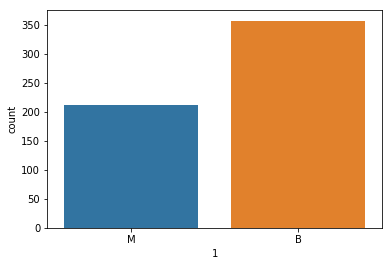

In [4]:
import matplotlib.pyplot as plt
#pyplot is matplotlib's plotting framework
import seaborn as sns
# Seaborn is a Python data visualization library based on matplotlib. 

sns.countplot(df[1])
plt.show()

##### Correlation Heat map

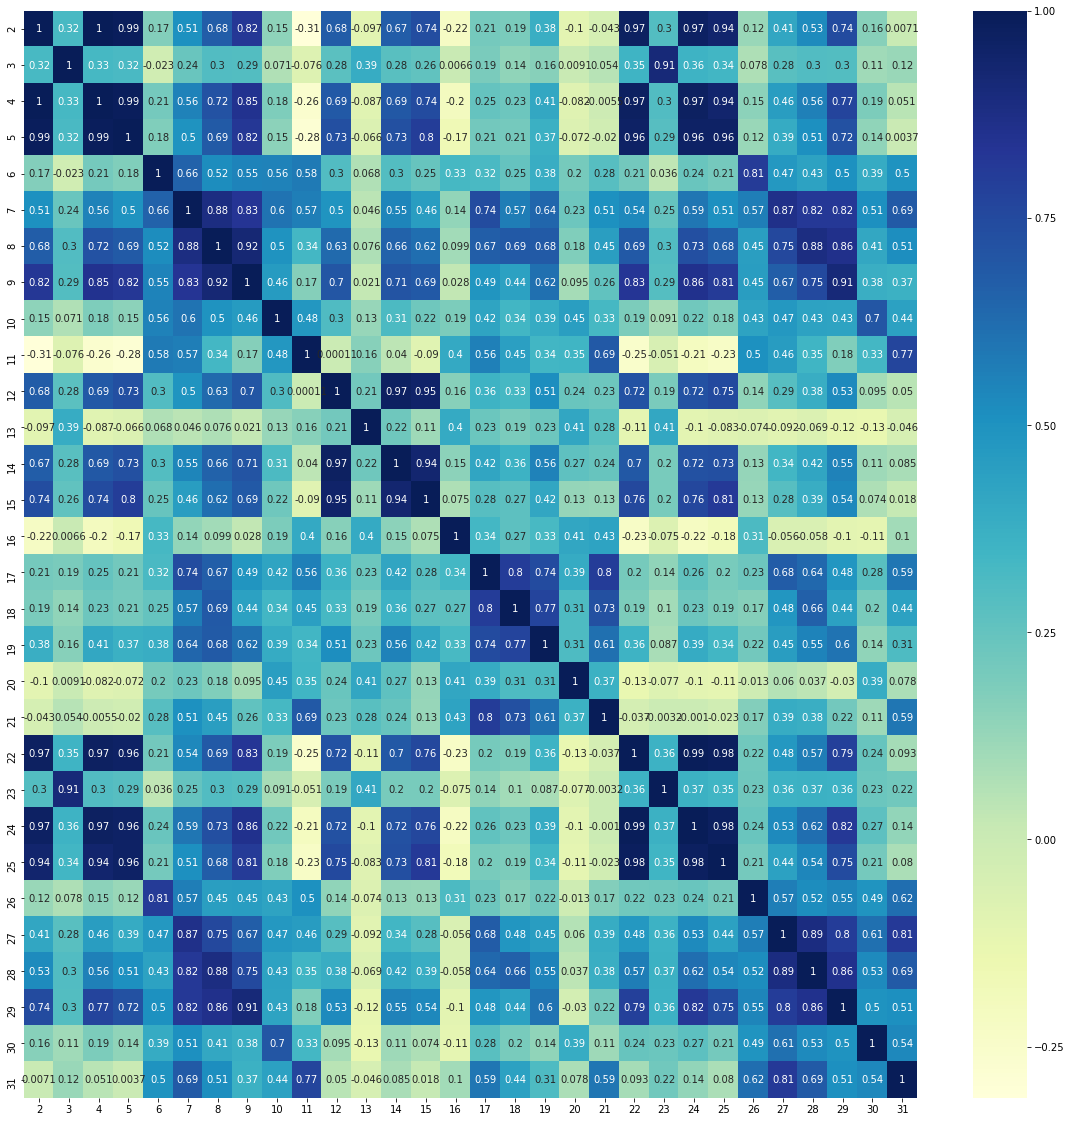

In [5]:
f, ax = plt.subplots(figsize=(20,20))
# creating correlation matrix
corr = df.iloc[:,2:].corr()

#using a heatmap to visualize the correlation matrix
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap="YlGnBu",annot=True)

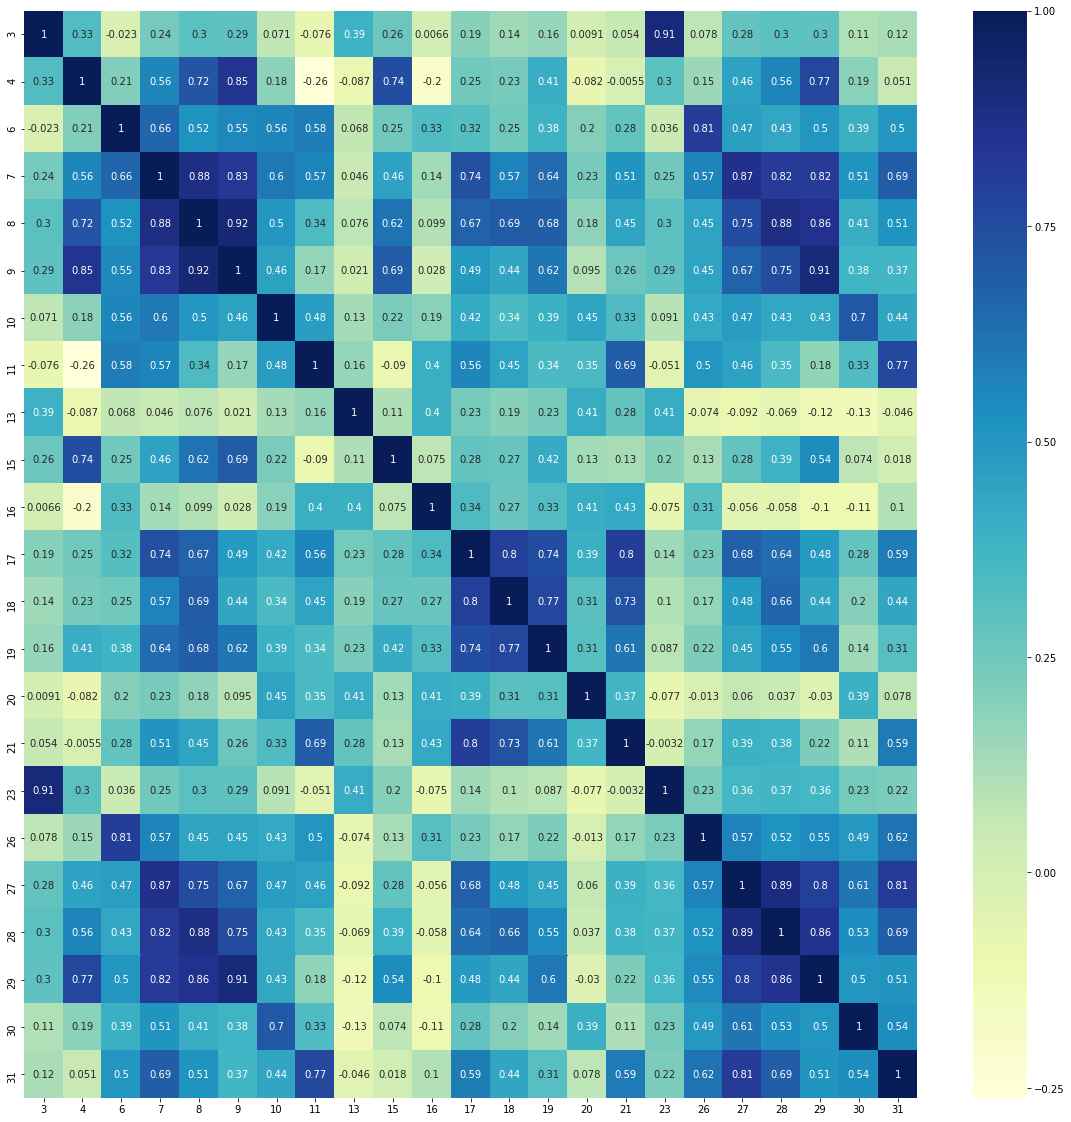

In [6]:
df2= df.copy()
df2.drop(df2.columns[[2,5,12,14,22,24,25]],axis=1, inplace = True)
f, ax = plt.subplots(figsize=(20,20))
# creating correlation matrix
corr2 = df2.iloc[:,2:].corr()

#using a heatmap to visualize the correlation matrix
sns.heatmap(corr2,
            xticklabels=corr2.columns.values,
            yticklabels=corr2.columns.values, cmap="YlGnBu",annot=True)

### Splitting data and standardization

In [7]:
#split dataset in features and target variable
X = df2.iloc[:,2:]# Features
y = df2[1] # Target variable
classes = ['B', 'M' ]
############################################## Split the Data ##############################################

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

############################################# Normalization #############################################

from sklearn.preprocessing import StandardScaler # Standardize features by removing the mean and scaling to unit variance

sc = StandardScaler()
sc.fit(X_train) # Compute the mean and std to be used for later scaling.

X_train_std = sc.transform(X_train) # Perform standardization of train set X by centering and scaling
X_test_std = sc.transform(X_test) # Perform standardization of test set Xby centering and scaling

### KNN Model Induction

In [8]:


############################################# Train the Model #############################################

from sklearn import neighbors, datasets

# KNeighborsClassifier is a classifier implementing the k-nearest neighbors vote.
# Learn more about it here https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Set parameters of KNeighborsClassifier
knn = neighbors.KNeighborsClassifier(n_neighbors=3, #n_neighbors is the k in the kNN
                           p=2, 
                           metric='minkowski',weights='distance') #The default metric is minkowski, which is a generalization of the Euclidean distance
                                               # with p=2 is equivalent to the standard Euclidean distance.
                                               # with p=1 is equivalent to the Mahattan distance.

# Train the model      
knn = knn.fit(X_train_std, y_train) 

### KNN Model Evaluation

Accuracy (out-of-sample): 0.93
Accuracy (in-sample): 1.00
              precision    recall  f1-score   support

           B       0.91      0.98      0.95       107
           M       0.96      0.84      0.90        64

   micro avg       0.93      0.93      0.93       171
   macro avg       0.94      0.91      0.92       171
weighted avg       0.93      0.93      0.93       171

Confusion matrix, without normalization
[[105   2]
 [ 10  54]]
Normalized confusion matrix
[[0.98 0.02]
 [0.16 0.84]]


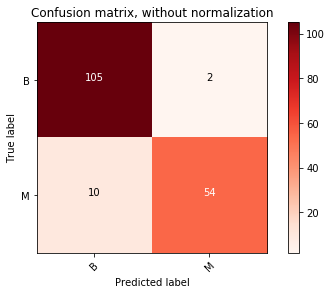

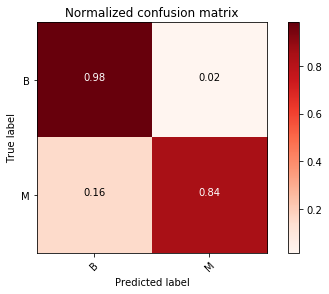

In [9]:
############################################# Evaluate the Model #############################################

# The sklearn.metrics module includes score functions, performance metrics and pairwise metrics 
# and distance computations.
# https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report

# Estimate the predicted values by applying the kNN algorithm
y_pred = knn.predict(X_test_std)
y_pred_insample = knn.predict(X_train_std)

# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy (in-sample): %.2f' % accuracy_score(y_train, y_pred_insample))

# F1 score
##print('F1 score M (out-of-sample): ', f1_score(y_test, y_pred, average='macro'))
#print('F1 score M (in-sample)    : ', f1_score(y_train, y_pred_insample, average='macro'))
##print('F1 score B (out-of-sample): ', f1_score(y_test, y_pred,pos_label='B'))

# Precision 
##print('Precision M: ', precision_score(y_test, y_pred,pos_label='M'))
##print('Recall M   : ', recall_score(y_test, y_pred,pos_label='M'))
##print('Precision B: ', precision_score(y_test, y_pred,pos_label='B'))
##print('Recall B  : ', recall_score(y_test, y_pred,pos_label='B'))


# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred, target_names=classes))


###################################### Confusion Matrix #####################################
from sklearn.metrics import confusion_matrix
import itertools
# Function that prints and plots the confusion matrix.
# Normalization can be applied by setting `normalize=True
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix to evaluate the accuracy of a classification    
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

#cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### Logistic Regression model induction and evaluation

C:\Users\Adil Ashish Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The weights of the attributes are: [[ -0.21   0.24  13.4  -14.06  26.    33.49 -14.64  -4.69  -4.6    0.3
   12.78 -26.23 -51.57   2.31  -6.5   -3.93   0.93  87.7  -25.53  20.9
   44.07  38.34   3.55]]
B [1.00e+00 7.81e-07] 1.0
              precision    recall  f1-score   support

           B       0.97      0.99      0.98       107
           M       0.98      0.95      0.97        64

   micro avg       0.98      0.98      0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

Confusion matrix, without normalization
[[106   1]
 [  3  61]]
Normalized confusion matrix
[[0.99 0.01]
 [0.05 0.95]]


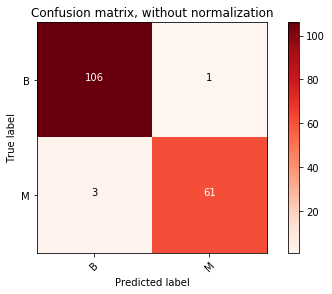

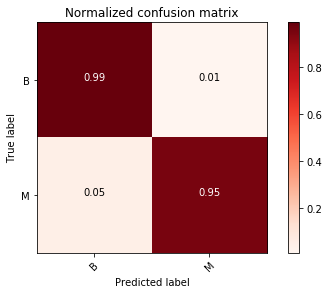

Accuracy (out-of-sample): 0.98
Accuracy (in-sample): 1.00


In [10]:
from sklearn import linear_model 
clf = linear_model.LogisticRegression(C=1e5)

clf = clf.fit(X_train, y_train)
print('The weights of the attributes are:', clf.coef_)
#################################### Apply the Logistic Regression Model ####################################

y_pred = clf.predict(X_test)             # Classification prediction
y_pred_prob = clf.predict_proba(X_test)  # Class probabilities
y_pred_insample = clf.predict(X_train)
print(y_pred[0], y_pred_prob[0], np.sum(y_pred_prob[0]))

################################### Evaluate the Logistic Regression Model ##################################

# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred, target_names=classes))

# Compute confusion matrix to evaluate the accuracy of a classification    
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

#cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy (in-sample): %.2f' % accuracy_score(y_train, y_pred_insample))